<a href="https://colab.research.google.com/github/Swapnadeepgit/Timeseries_ML/blob/main/timeseriesforecasatingusing_MLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project includes time series forecasting of Alcohol sales Data using two Machine learmning models Linear Regression and Random Forest



In [42]:
import pandas as pd
df= pd.read_csv('/content/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [18]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<Axes: xlabel='DATE'>

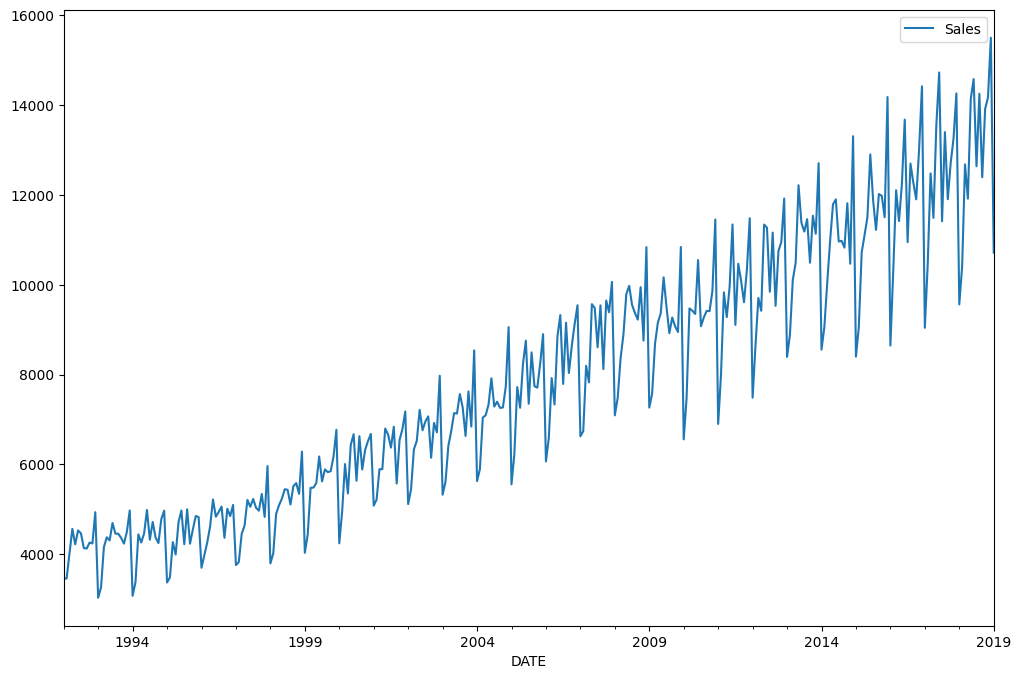

In [20]:
df.columns=['Sales']
df.plot(figsize=(12,8))

In [21]:
df['Sales_lastmonth']= df['Sales'].shift(1)
df['Sales_2monthsback']= df['Sales'].shift(2)
df['Sales_3monthsback']= df['Sales'].shift(3)
df['Sales_4monthsback']= df['Sales'].shift(4)
df['Sales_5monthsback']= df['Sales'].shift(5)
df

,Sales,Sales_lastmonth,Sales_2monthsback,Sales_3monthsback,Sales_4monthsback,Sales_5monthsback
DATE,,,,,,
1992-01-01,3459,NaN,NaN,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN,NaN,NaN
1992-04-01,4564,4002.0,3458.0,3459.0,NaN,NaN
1992-05-01,4221,4564.0,4002.0,3458.0,3459.0,NaN
...,...,...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0,14138.0,11919.0
2018-10-01,13914,12396.0,14257.0,12640.0,14583.0,14138.0
2018-11-01,14174,13914.0,12396.0,14257.0,12640.0,14583.0


In [23]:
df=df.dropna()
df

,Sales,Sales_lastmonth,Sales_2monthsback,Sales_3monthsback,Sales_4monthsback,Sales_5monthsback
DATE,,,,,,
1992-06-01,4529,4221.0,4564.0,4002.0,3458.0,3459.0
1992-07-01,4466,4529.0,4221.0,4564.0,4002.0,3458.0
1992-08-01,4137,4466.0,4529.0,4221.0,4564.0,4002.0
1992-09-01,4126,4137.0,4466.0,4529.0,4221.0,4564.0
1992-10-01,4259,4126.0,4137.0,4466.0,4529.0,4221.0
...,...,...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0,14138.0,11919.0
2018-10-01,13914,12396.0,14257.0,12640.0,14583.0,14138.0
2018-11-01,14174,13914.0,12396.0,14257.0,12640.0,14583.0


In [27]:
# calling linear regression
from sklearn.linear_model import LinearRegression
lin_model= LinearRegression()

In [28]:
#calling Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor()

In [32]:
#data pre processing using numpy
import numpy as np
X= np.array(df[['Sales_lastmonth','Sales_2monthsback','Sales_3monthsback','Sales_4monthsback','Sales_5monthsback']])
y= np.array(df['Sales'])
#reshaping
X= X.reshape(-1,5)
y= y.reshape(-1,1)
#final concatenation of x values
X= np.concatenate((X,X), axis=1)
print(X)

[[ 4221.  4564.  4002. ...  4002.  3458.  3459.]
 [ 4529.  4221.  4564. ...  4564.  4002.  3458.]
 [ 4466.  4529.  4221. ...  4221.  4564.  4002.]
 ...
 [13914. 12396. 14257. ... 14257. 12640. 14583.]
 [14174. 13914. 12396. ... 12396. 14257. 12640.]
 [15504. 14174. 13914. ... 13914. 12396. 14257.]]


In [35]:
from sklearn.model_selection import train_test_split  # Import from the correct module
X_trian, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)




In [36]:
#fit model
lin_model.fit(X_trian, y_train)
rf_model.fit(X_trian, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

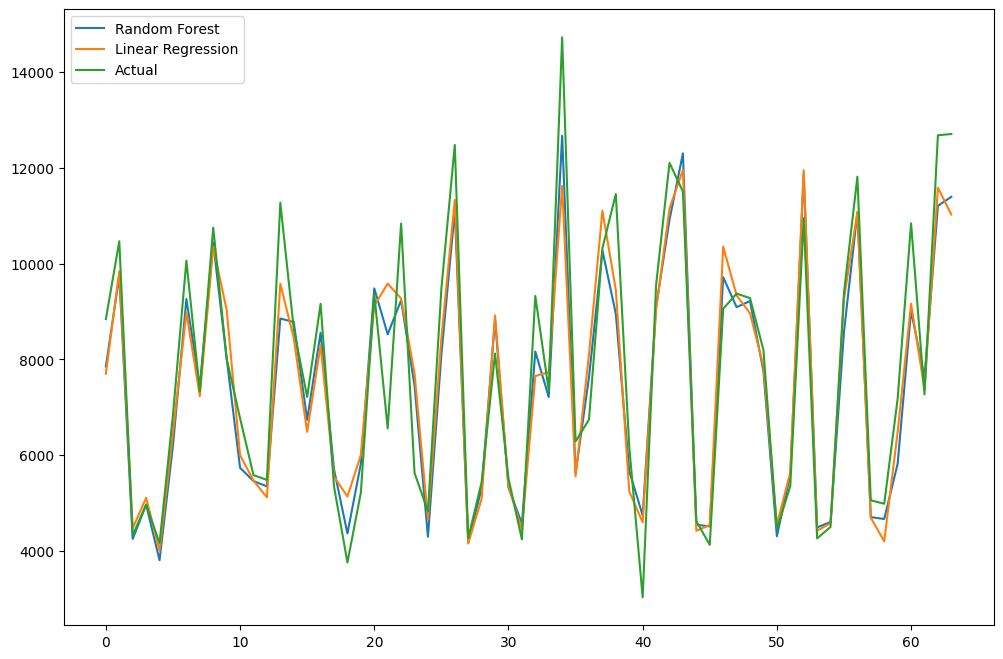

In [38]:
#model prediction
import matplotlib.pyplot as plt
lin_pred= lin_model.predict(X_test)
rf_pred= rf_model.predict(X_test)
plt.rcParams['figure.figsize']=(12,8)
plt.plot(rf_pred, label='Random Forest')
plt.plot(lin_pred, label='Linear Regression')
plt.plot(y_test, label='Actual')
plt.legend(loc='upper left')
plt.show()

In [39]:
#checking the mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
lin_rmse= sqrt(mean_squared_error(y_test, lin_pred))
rf_rmse= sqrt(mean_squared_error(y_test, rf_pred))

In [40]:
print('The rmse of random forest model is', rf_rmse)
print('The rmse of linear regression model is', lin_rmse)

The rmse of random forest model is 942.3782893728239
The rmse of linear regression model is 1024.7561889570197
